## scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [9]:
X2.shape

(100, 3)

In [10]:
X[:5,:]

array([[-0.6242688 ],
       [-1.96312044],
       [ 2.39167104],
       [ 2.04091827],
       [-2.43994357]])

In [11]:
X2[:5,:]

array([[ 1.        , -0.6242688 ,  0.38971153],
       [ 1.        , -1.96312044,  3.85384185],
       [ 1.        ,  2.39167104,  5.72009037],
       [ 1.        ,  2.04091827,  4.1653474 ],
       [ 1.        , -2.43994357,  5.95332461]])

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

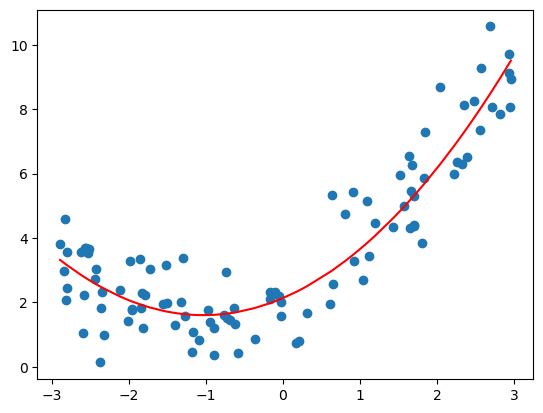

In [13]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [14]:
lin_reg2.coef_

array([0.        , 1.02596439, 0.49661015])

In [15]:
lin_reg2.intercept_

2.134506443679153

### 关于PolynomialFeatures

In [16]:
X = np.arange(1, 11).reshape(-1, 2)

In [17]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [18]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [19]:
X2.shape

(5, 6)

In [20]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline

In [21]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [22]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

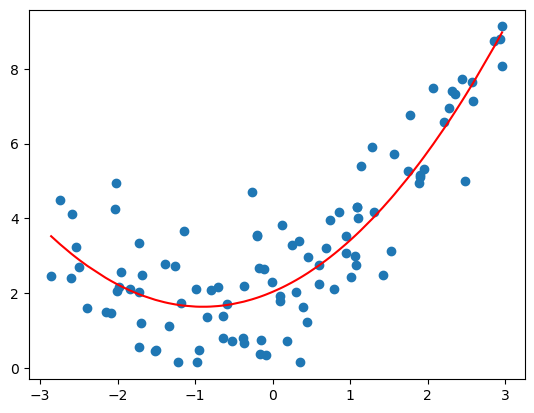

In [23]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()